# Experiment 1
Evaluate AG-CNN trained on various data (sub)sets. \
"MiraBestNOUNC" (code) == "MiraBest*" (paper)

Compare to Tang et al. 2019: \
https://www.semanticscholar.org/paper/Transfer-learning-for-radio-galaxy-classification-Tang-Scaife/f273f4d4e4ba956c83ff71fd7748dff22552d87b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import glob
from utils import *
from PIL import Image
import matplotlib.gridspec as gridspec
from models_new import *
#functions_list()

## Load Model and Data

In [2]:
paths = [
    '0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05',
    '0709Exp1-range_norm-MiraBestNOUNCAdam-AGRadGalNetft-5e-05',
    '0709Exp1-range_norm-FRDEEPAdam-AGRadGalNetft-5e-05'
]

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
nets = []
evaluations = []

for p in paths:
    model_name = path_to_model(p)
    nets.append(load_net(model_name, device))
    evaluations.append(evaluate(p))

PATH: TrainedNetworks/0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05/26.pt
/0709Exp1 9Exp 1
PATH: TrainedNetworks/0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05
PATH: TrainedNetworks/0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05/26.pt
/0709Exp1 9Exp 1


/usr/local/anaconda-python-3.6/lib/python3.6/site-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


PATH: TrainedNetworks/0709Exp1-range_norm-MiraBestNOUNCAdam-AGRadGalNetft-5e-05/95.pt
/0709Exp1 9Exp 1
PATH: TrainedNetworks/0709Exp1-range_norm-MiraBestNOUNCAdam-AGRadGalNetft-5e-05
PATH: TrainedNetworks/0709Exp1-range_norm-MiraBestNOUNCAdam-AGRadGalNetft-5e-05/95.pt
/0709Exp1 9Exp 1


/usr/local/anaconda-python-3.6/lib/python3.6/site-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


PATH: TrainedNetworks/0709Exp1-range_norm-FRDEEPAdam-AGRadGalNetft-5e-05/81.pt
/0709Exp1 9Exp 1
PATH: TrainedNetworks/0709Exp1-range_norm-FRDEEPAdam-AGRadGalNetft-5e-05
PATH: TrainedNetworks/0709Exp1-range_norm-FRDEEPAdam-AGRadGalNetft-5e-05/81.pt
/0709Exp1 9Exp 1


/usr/local/anaconda-python-3.6/lib/python3.6/site-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


## Summary of the AG-CNN Network Architecture

In [4]:
summary(nets[0], (1,150,150))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 6, 150, 150]              60
       BatchNorm2d-2          [-1, 6, 150, 150]              12
              ReLU-3          [-1, 6, 150, 150]               0
            Conv2d-4          [-1, 6, 150, 150]             330
       BatchNorm2d-5          [-1, 6, 150, 150]              12
              ReLU-6          [-1, 6, 150, 150]               0
            Conv2d-7          [-1, 6, 150, 150]             330
       BatchNorm2d-8          [-1, 6, 150, 150]              12
              ReLU-9          [-1, 6, 150, 150]               0
        MaxPool2d-10            [-1, 6, 75, 75]               0
           Conv2d-11           [-1, 16, 75, 75]             880
      BatchNorm2d-12           [-1, 16, 75, 75]              32
             ReLU-13           [-1, 16, 75, 75]               0
           Conv2d-14           [-1, 16,

/usr/local/anaconda-python-3.6/lib/python3.6/site-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


## Model Evaluation

---------------->	MiraBest
Table 3 HM Transfer Learning Equivalent Results:

		FRI 	FRII
Recall 		0.754 	0.927
Precision 	0.907	0.801
F1 Score 	0.823	0.860

Avg. Accuracy 	84.4%
AUC 		0.920



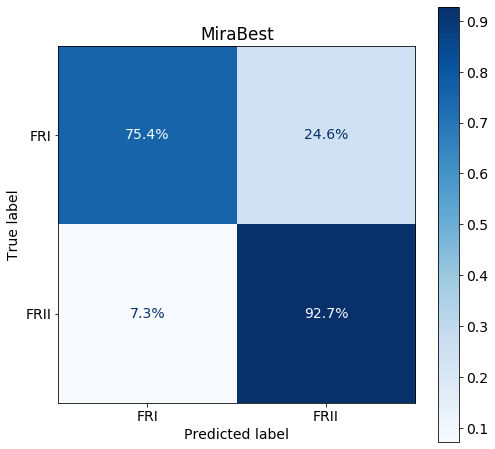

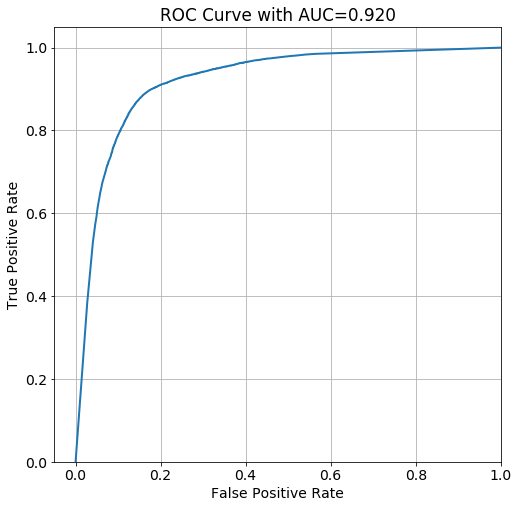

---------------->	MiraBestNOUNC
Table 3 HM Transfer Learning Equivalent Results:

		FRI 	FRII
Recall 		0.940 	0.896
Precision 	0.890	0.944
F1 Score 	0.914	0.919

Avg. Accuracy 	91.7%
AUC 		0.964



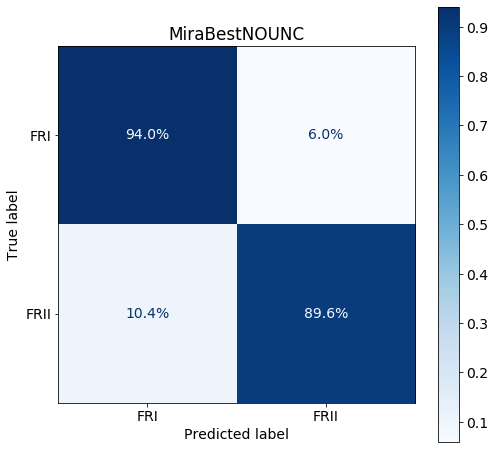

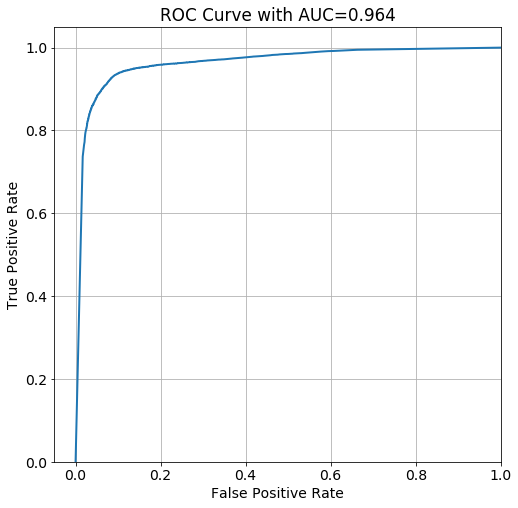

---------------->	FRDEEP
Table 3 HM Transfer Learning Equivalent Results:

		FRI 	FRII
Recall 		0.873 	0.895
Precision 	0.867	0.900
F1 Score 	0.870	0.897

Avg. Accuracy 	88.5%
AUC 		0.894



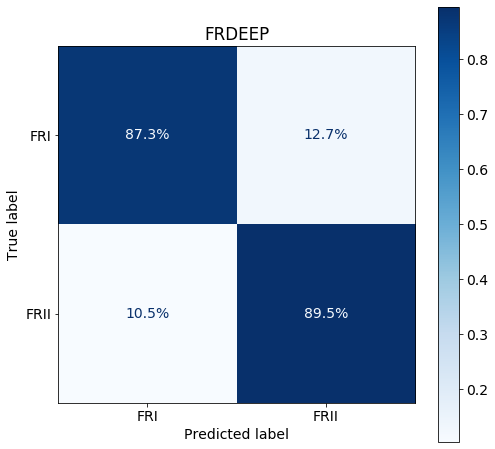

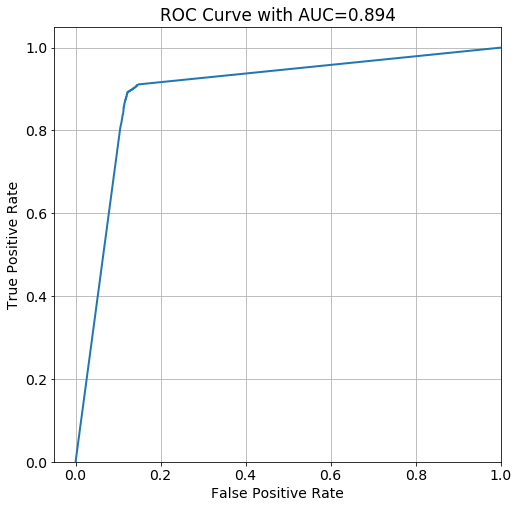

In [5]:
for idx, d in enumerate(['MiraBest', 'MiraBestNOUNC','FRDEEP']):
    # Evaluation through Utils.py
    out = evaluations[idx]
    net = nets[idx]
    print(f'---------------->\t{d}')
    out_print(out)
    
    # Confusion Matrix
    confusion = np.asarray([out[6],out[8],out[7],out[9]]).reshape(2,2)
    plot_conf_mat(confusion,
                  normalised=True,
                  n_classes=2,
                  format_input=None,
                  title=d)
    # ROC Curve
    fpr, tpr = out[-3:-1]
    plot_roc_curve(fpr, tpr)

## Consider Example Sources

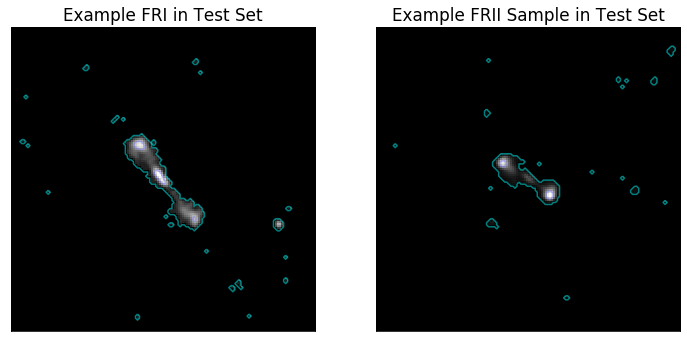

In [6]:
# Load data
test_data, out_data = data_call('MiraBest', dataloader=False)
data = out_data
outset = data.data.squeeze()
classes = ['FRI','FRII']

# Manually selected due to obvious classification of respective sources
fri_np = outset[8]
frii_np= outset[92]

# Display sources
plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(fri_np, cmap='Greys_r') #Certain FRI Example
plt.contour(fri_np, 1, cmap='cool', alpha=0.5)
plt.title(f'Example FRI in Test Set')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(frii_np, cmap = 'Greys_r') #Certain FRII Example
plt.contour(frii_np, 1, cmap='cool', alpha=0.5)
plt.title(f'Example FRII Sample in Test Set')
plt.xticks([])
plt.yticks([])

plt.show()

In [7]:
# Transform images into valid input (must be tensor of given size on same device as model etc.)
fri = torch.from_numpy(fri_np ).view(1,1,150,150).float().to(device)
frii= torch.from_numpy(frii_np).view(1,1,150,150).float().to(device)
sources = [fri, frii]
labels_ = ['FRI', 'FRII']

# Attention Plot Examples for MiraBest Trained Model

In [8]:
# Evaluate Attention Maps for MiraBest (NOHYBRID) variant:
net = nets[0]

Models Classification: 
[1. 0.] for the FRI example (True)
[0. 1.] for the FRII example (True)


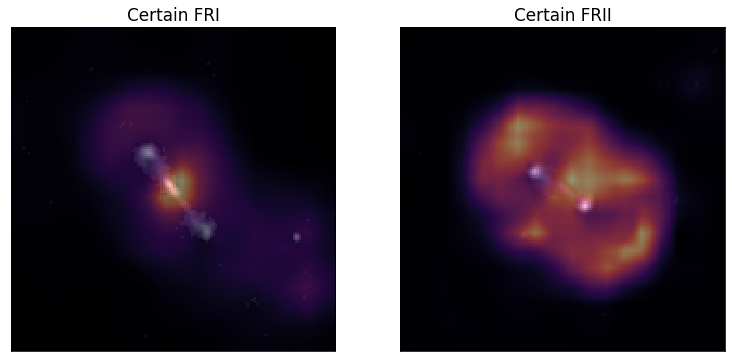

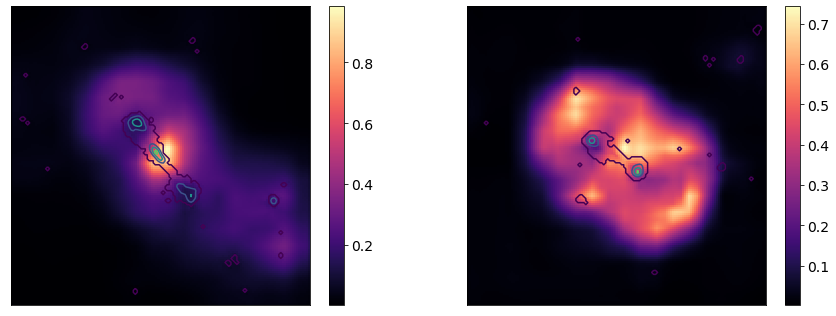

Maximum Value of FRI example attention map: 0.9847266845347707
Maximum Value of FRII example attention map: 0.742712098558743


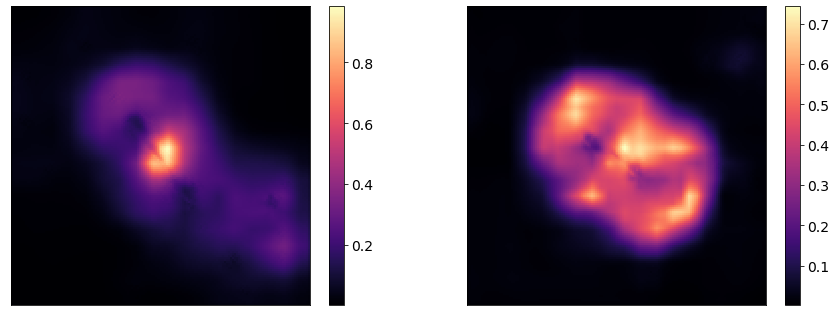

In [9]:
layer_no=3
cmap_name='magma'
fr1_pred = net(sources[0]).cpu().detach().numpy()[0]
fr2_pred = net(sources[1]).cpu().detach().numpy()[0]
print(f'Models Classification: \n{fr1_pred} for the FRI example ({fr1_pred[0]==1})\n{fr2_pred} for the FRII example ({fr2_pred[0]==0})')


# Averaged Upscaled and Averaged Attention Maps for Example Sources (with overlay of original sources)
fig, axs = plt.subplots(1, len(sources), figsize=(12.8,9))
amaps = []
for idx, source in enumerate(sources):
    ax = axs[idx]
    amap, original = attentions_func(source, net, mean=True, device=device, layer_name_base='attention', layer_no=layer_no)
    amaps.append(amap)
    img = mask_on_image(source, amap, cmap_name=cmap_name)
    ax.imshow(img)
    ax.set_title(f'Certain {classes[idx]}')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


# Averaged Upscaled and Averaged Attention Maps for Example Sources (with contours of original sources)
fig, axs = plt.subplots(1, len(sources), figsize=(15,5.5))
amaps = []
for idx, source in enumerate(sources):
    ax = axs[idx]
    amap, original = attentions_func(source, net, mean=True, device=device, layer_name_base='attention', layer_no=layer_no)
    amaps.append(amap)
    img = ax.imshow(amap.squeeze(), cmap=cmap_name)
    fig.colorbar(img, ax=ax)
    im2 = ax.contour(source.cpu().numpy().squeeze(), 3)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


# Averaged Upscaled and Averaged Attention Maps for Example Sources (without contours of original sources)
fig, axs = plt.subplots(1, len(sources), figsize=(15,5.5))
amaps = []
for idx, source in enumerate(sources):
    ax = axs[idx]
    amap, original = attentions_func(source, net, mean=True, device=device, layer_name_base='attention', layer_no=layer_no)
    amaps.append(amap)
    img = ax.imshow(amap.squeeze(), cmap=cmap_name)
    fig.colorbar(img, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    print(f'Maximum Value of {labels_[idx]} example attention map: {amap.squeeze().max()}')
plt.show()

## Individual Attention Maps

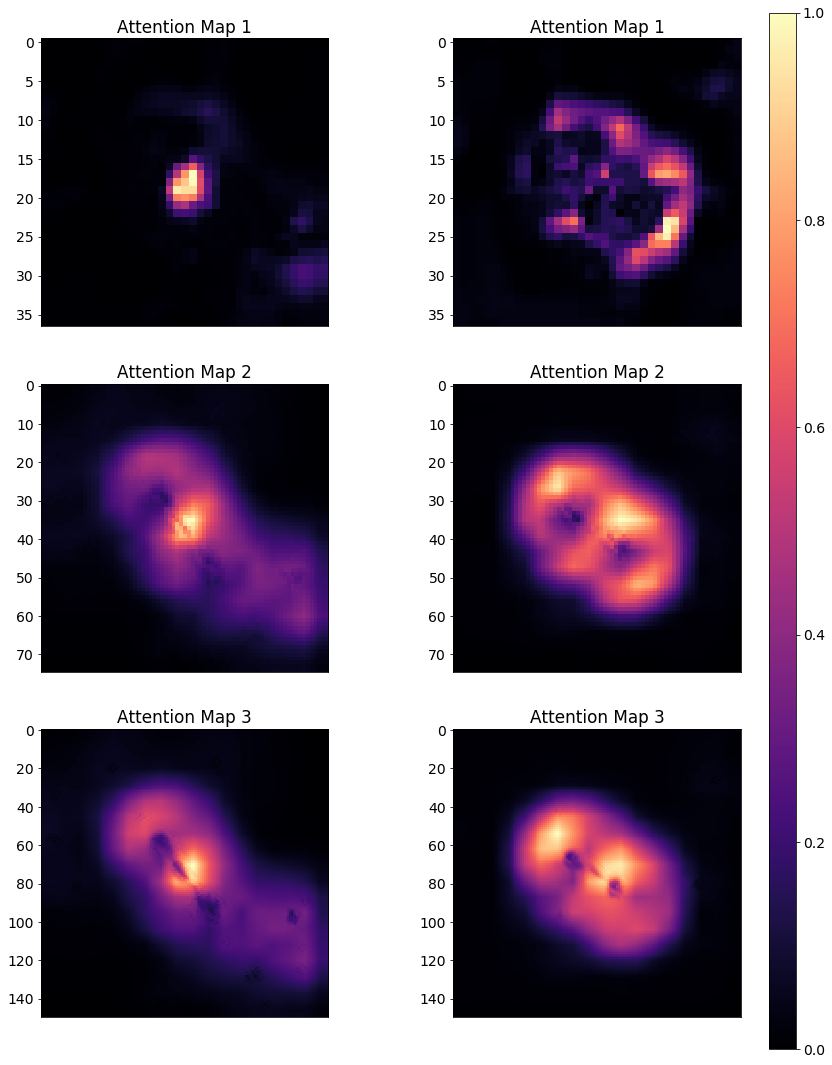

In [10]:
fig, axs = plt.subplots(layer_no, len(sources), figsize=(len(sources*5)*1.5, layer_no*4*1.5))
for idx, source in enumerate(sources):
    amap, original = attentions_func(source, net, mean=True, device=device, layer_name_base='attention', layer_no=layer_no)
    for row in range(layer_no):
        ax = axs[row, idx]    
        img = ax.imshow(original[row].squeeze(), cmap=cmap_name)
        ax.set_title(f'Attention Map {row+1}')
        ax.set_xticks([])

fig.subplots_adjust(right=0.825)
cbar_ax = fig.add_axes([0.825,0.1, 0.025, 0.8])
fig.colorbar(img, cax=cbar_ax)

plt.show()

# Attention Plot for Selection of Sources by Epoch

PATH: TrainedNetworks/0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05/26.pt
/0709Exp1 9Exp 1
Source images followed by their respective averaged attention maps at epochs:
[0, 3, 8, 13, 26]


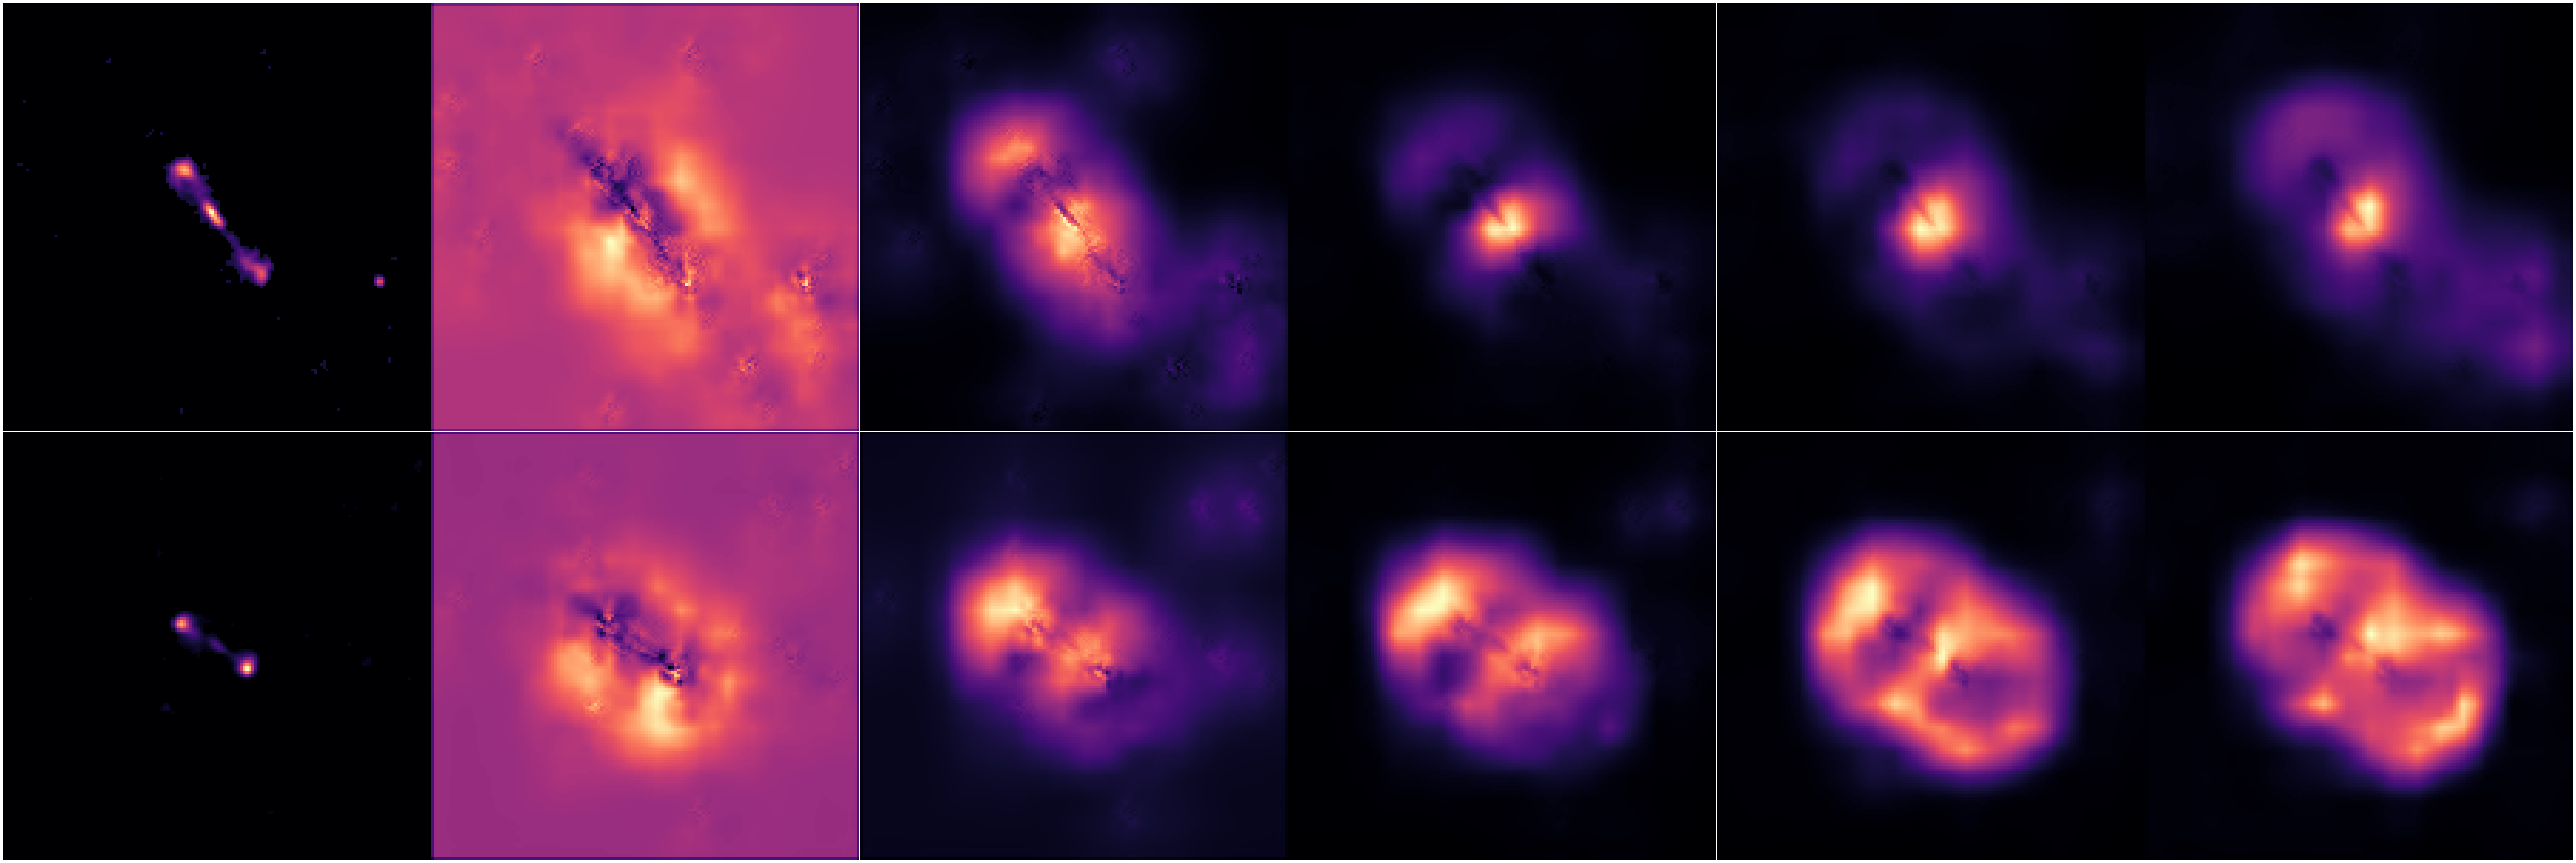

In [11]:
sources = []
allowed_sources = [8,92,0,1,2,91,90,89]
allowed_sources = [8,92]
first = True
for idx, img in enumerate(data.data):
    if idx in allowed_sources:
        if first:
            first = False
            sources_epoch = torch.Tensor(img).view(-1,1,150,150)
        else:
            sources_epoch = torch.cat((sources_epoch, torch.Tensor(img).view(-1,1,150,150)), dim=0)

# Change 'width' to see more of the development
attention_epoch_plot(
    sources_epoch,
    paths[0],
    width=5,
    device=device,
    layer_name_base='attention',
    layer_no=layer_no,
    cmap_name='magma'
)

# Training Losses Corresponding to Epoch Images Above

PATH: TrainingLosses/0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNet-5e-05_Losses.npz


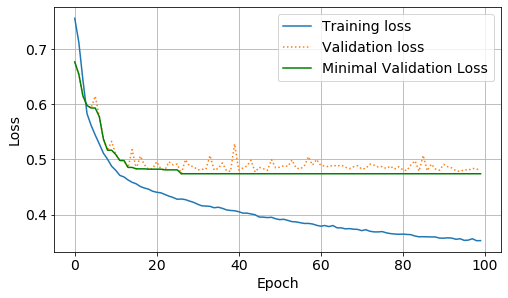

In [12]:
training_validation('0709Exp1-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNet-5e-05_Losses', publication=True)

## Prediction Value Consideration

In [13]:
predicted, predicted_prob, labels = prediction('MiraBest', net, [[0,1,2,3,4],[5,6,7]], device=device, reps=180)

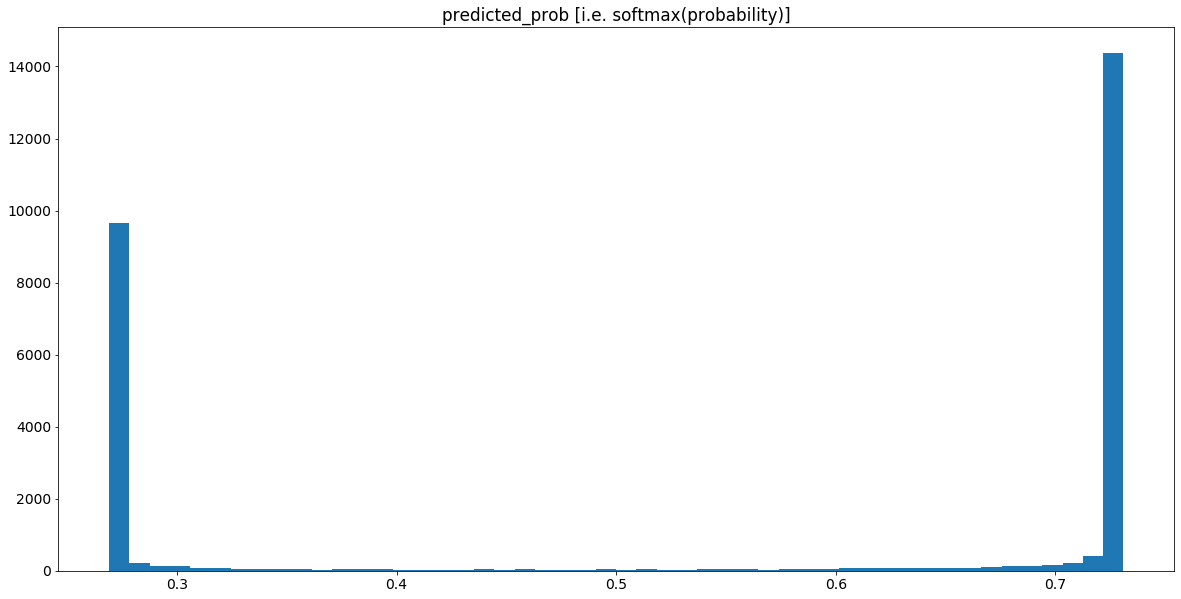

In [14]:
no_bins = 50

plt.figure(figsize=(20,10))
#plt.subplot(121)
#plt.hist(predicted, no_bins)
#plt.title('predicted')

#plt.subplot(122)
plt.hist(predicted_prob, no_bins)
plt.title('predicted_prob [i.e. softmax(probability)]')
plt.show()

## Average time to train models
Times saved in "TrainingTimes.txt"

In [15]:
times = np.loadtxt('TrainingTimes')
times = times[2:19] #[0:2] are experiment 1 results, [3:19] are experiment 2 results, and [19:] are experiment 3 results.
print(times,times.shape)

print(len(times))
m = np.mean(times)
print(f'Hours: {m/60/60:.0f}hours {m/60%60:.1f}min')
print(f'std deviation: {np.std(times)/60:.1f}min')

[32934.043338 33625.580677 35969.108461 36220.472426 34478.190184
 33791.509477 35047.267943 35089.589293 31449.088296 24863.504579
 24885.943979 24825.885263 24874.018982 24919.04754  24885.570833
 24845.313978 24785.987799] (17,)
17
Hours: 8hours 17.5min
std deviation: 80.3min
